# Artificial Neuron Layer 
A layer of neurons performs:
1. A linear transformation (matrix multiplication + bias)
2.	A non-linear transformation (activation function)

Mathematically:
$$\mathbf{Z} = \mathbf{W} \cdot \mathbf{X} + \mathbf{b}
\quad \Rightarrow \quad
\hat{\mathbf{Y}} = \sigma(\mathbf{Z})$$

In [1]:
import torch 
import matplotlib.pyplot as plt

In [2]:
# Neuron setup 
n_input = 1000 
n_neurons = 100
# simuluting the input x transform 
x= torch.rand(n_input)
x

tensor([0.7976, 0.5984, 0.0717, 0.7774, 0.2830, 0.7736, 0.5406, 0.5218, 0.6979,
        0.9429, 0.0956, 0.0841, 0.2910, 0.7871, 0.9510, 0.1539, 0.2066, 0.8796,
        0.3151, 0.8253, 0.6651, 0.6387, 0.2008, 0.8564, 0.7553, 0.4736, 0.3030,
        0.8900, 0.0815, 0.8413, 0.0312, 0.2962, 0.3248, 0.8344, 0.8596, 0.5735,
        0.6911, 0.6150, 0.8314, 0.5278, 0.1767, 0.3034, 0.3234, 0.1508, 0.5494,
        0.7102, 0.4429, 0.2097, 0.7182, 0.5065, 0.4976, 0.7617, 0.7906, 0.8984,
        0.9892, 0.4546, 0.3235, 0.1786, 0.4698, 0.0495, 0.4467, 0.4344, 0.8985,
        0.4443, 0.9918, 0.9537, 0.3968, 0.7884, 0.2246, 0.7695, 0.2986, 0.8409,
        0.8450, 0.4754, 0.5229, 0.2799, 0.5270, 0.0783, 0.7094, 0.7556, 0.5807,
        0.2579, 0.2940, 0.7430, 0.3702, 0.5821, 0.3409, 0.8107, 0.0395, 0.5584,
        0.0794, 0.4155, 0.3140, 0.8186, 0.3985, 0.6903, 0.5481, 0.9109, 0.0462,
        0.9615, 0.9124, 0.1754, 0.0356, 0.7791, 0.2222, 0.0740, 0.5942, 0.4006,
        0.7933, 0.7079, 0.9680, 0.4916, 

In [3]:
b= torch.zeros(n_neurons)
b.shape
b

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

In [4]:
x.shape

torch.Size([1000])

In [5]:
x[0:100]

tensor([0.7976, 0.5984, 0.0717, 0.7774, 0.2830, 0.7736, 0.5406, 0.5218, 0.6979,
        0.9429, 0.0956, 0.0841, 0.2910, 0.7871, 0.9510, 0.1539, 0.2066, 0.8796,
        0.3151, 0.8253, 0.6651, 0.6387, 0.2008, 0.8564, 0.7553, 0.4736, 0.3030,
        0.8900, 0.0815, 0.8413, 0.0312, 0.2962, 0.3248, 0.8344, 0.8596, 0.5735,
        0.6911, 0.6150, 0.8314, 0.5278, 0.1767, 0.3034, 0.3234, 0.1508, 0.5494,
        0.7102, 0.4429, 0.2097, 0.7182, 0.5065, 0.4976, 0.7617, 0.7906, 0.8984,
        0.9892, 0.4546, 0.3235, 0.1786, 0.4698, 0.0495, 0.4467, 0.4344, 0.8985,
        0.4443, 0.9918, 0.9537, 0.3968, 0.7884, 0.2246, 0.7695, 0.2986, 0.8409,
        0.8450, 0.4754, 0.5229, 0.2799, 0.5270, 0.0783, 0.7094, 0.7556, 0.5807,
        0.2579, 0.2940, 0.7430, 0.3702, 0.5821, 0.3409, 0.8107, 0.0395, 0.5584,
        0.0794, 0.4155, 0.3140, 0.8186, 0.3985, 0.6903, 0.5481, 0.9109, 0.0462,
        0.9615])

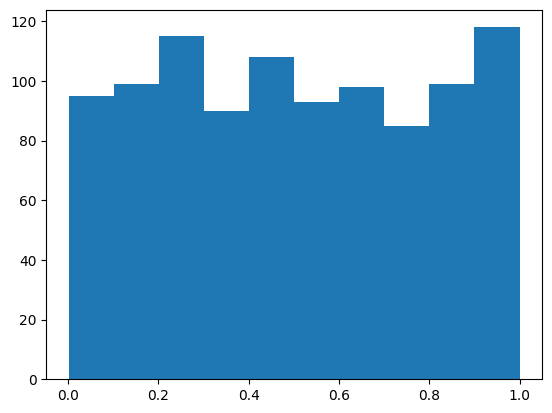

In [6]:
_= plt.hist(x)

In [7]:
# Randomizing weights 
W= torch.empty([n_input, n_neurons])
W =torch.nn.init.xavier_normal_(W)


In [8]:
print(x.shape, W.shape)

torch.Size([1000]) torch.Size([1000, 100])


In [9]:
from numpy import transpose
W_t = transpose(W)
x_w = torch.mul(x, W_t)



In [10]:
x_w

tensor([[-0.0036,  0.0303, -0.0066,  ..., -0.0001,  0.0387,  0.0883],
        [ 0.0296, -0.0072, -0.0017,  ..., -0.0002, -0.0366,  0.0164],
        [ 0.0232,  0.0194, -0.0007,  ..., -0.0003,  0.0106,  0.0021],
        ...,
        [-0.0451,  0.0206, -0.0019,  ...,  0.0009, -0.0181, -0.0136],
        [ 0.0259,  0.0502,  0.0024,  ...,  0.0022, -0.0301, -0.0157],
        [ 0.0123, -0.0116, -0.0030,  ..., -0.0009,  0.0014, -0.0372]])

In [11]:
print(x.shape)
print(W.shape)
z =torch.matmul(x, W)+b

torch.Size([1000])
torch.Size([1000, 100])


In [12]:
z
z.shape

torch.Size([100])

In [13]:
a = torch.tanh(z)


In [14]:
aa = torch.sigmoid(z)

In [15]:
a

tensor([-0.8691, -0.5619, -0.5304, -0.0309,  0.5658, -0.2712, -0.9423,  0.7631,
        -0.7300,  0.7496, -0.4363,  0.6479, -0.3483, -0.1493, -0.9178,  0.5009,
         0.5605, -0.7518, -0.7407,  0.0981, -0.1961, -0.5067, -0.4454,  0.4543,
        -0.8497, -0.0361, -0.3228, -0.0878, -0.3119,  0.3923,  0.3665, -0.1866,
         0.7428, -0.5494,  0.5946, -0.2166,  0.4367,  0.3961, -0.7313, -0.4238,
         0.0038, -0.0228, -0.9025, -0.8043,  0.9577, -0.5553, -0.0703, -0.0323,
         0.6475, -0.8795,  0.6134, -0.5029,  0.8773, -0.8338, -0.4741,  0.0174,
         0.9343, -0.9493, -0.2196,  0.5214, -0.3004,  0.6853,  0.8661,  0.0887,
         0.5297, -0.5130, -0.2246, -0.8515, -0.7270,  0.7436,  0.7717, -0.0612,
        -0.1908, -0.7335, -0.2463, -0.5523, -0.4277,  0.2531, -0.7911, -0.1536,
        -0.2037,  0.7489,  0.8247, -0.3653, -0.7760, -0.0763,  0.0258, -0.6885,
         0.6240, -0.8054,  0.9938,  0.2349,  0.9215, -0.8488, -0.9347, -0.1377,
        -0.6473,  0.4279, -0.3054,  0.86

In [16]:
aa

tensor([0.2093, 0.3463, 0.3565, 0.4923, 0.6551, 0.4309, 0.1471, 0.7318, 0.2832,
        0.7255, 0.3852, 0.6839, 0.4101, 0.4625, 0.1715, 0.6343, 0.6533, 0.2735,
        0.2785, 0.5246, 0.4505, 0.3639, 0.3825, 0.6201, 0.2218, 0.4910, 0.4171,
        0.4780, 0.4200, 0.6022, 0.5949, 0.4529, 0.7225, 0.3503, 0.6648, 0.4452,
        0.6150, 0.6033, 0.2826, 0.3888, 0.5010, 0.4943, 0.1846, 0.2477, 0.8719,
        0.3484, 0.4824, 0.4919, 0.6837, 0.2020, 0.6714, 0.3651, 0.7964, 0.2314,
        0.3739, 0.5044, 0.8444, 0.1389, 0.4444, 0.6407, 0.4231, 0.6983, 0.7887,
        0.5222, 0.6433, 0.3620, 0.4431, 0.2207, 0.2845, 0.7228, 0.7359, 0.4847,
        0.4519, 0.2817, 0.4375, 0.3494, 0.3877, 0.5643, 0.2546, 0.4614, 0.4485,
        0.7252, 0.7634, 0.4054, 0.2621, 0.4809, 0.5064, 0.3005, 0.6752, 0.2472,
        0.9472, 0.5596, 0.8319, 0.2224, 0.1552, 0.4654, 0.3164, 0.6124, 0.4218,
        0.7907])

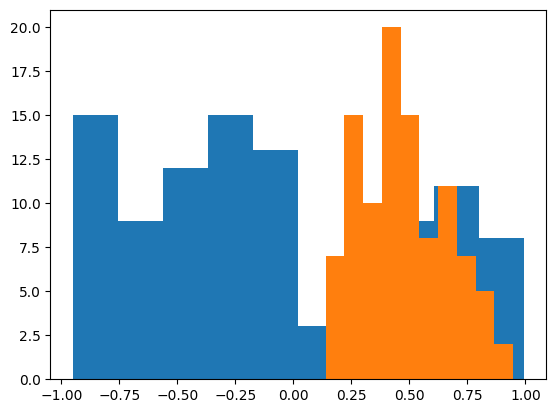

In [17]:
_ = plt.hist(a)
_= plt.hist(aa)

In [18]:
def perceptron(x,W,b):
    """
    A simple perceptron implementation
    """
    z = torch.matmul(x, W) + b
    y = torch.where(z>0, 1, 0)
    return y

In [19]:
y = perceptron(x,W,b)

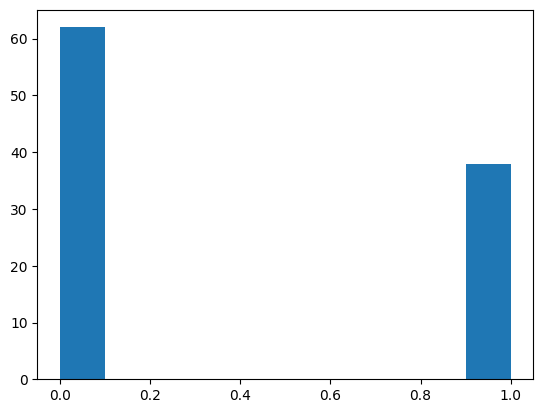

In [20]:
_=plt.hist(y)